In [1]:
# load packages
import pandas as pd
import plotly
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

This analysis includes the first observation in VR discharge steps. Previously, it was filtered out on an accident.

In [2]:
nasa53_56 = pd.read_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa_rebound_data_NEW5356.csv')
nasa45_48 = pd.read_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa_rebound_data_NEW4548.csv')
nasa5_18 = pd.read_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa_rebound_data_NEW518.csv')

In [3]:
nasa5_18 = nasa5_18.drop(nasa5_18.columns[0], axis = 1)
nasa45_48 = nasa45_48.drop(nasa45_48.columns[0], axis = 1)
nasa53_56 = nasa53_56.drop(nasa53_56.columns[0], axis = 1)
nasa5_18.columns, nasa45_48.columns, nasa53_56.columns

(Index(['Source', 'Chemistry', 'Cell', 'Cycle', 'Step', 'Cycle_Type', 'Time',
        'Voltage', 'Reference Capacity', 'Instantaneous Capacity',
        'Charge_Capacity', 'Discharge_Capacity', 'Temperature',
        'Ambient_Temperature', 'Current', 'Charge_Type', 'Step_Time',
        'Current_Diff'],
       dtype='object'),
 Index(['Source', 'Chemistry', 'Cell', 'Cycle', 'Step', 'Cycle_Type', 'Time',
        'Voltage', 'Reference Capacity', 'Instantaneous Capacity',
        'Charge_Capacity', 'Discharge_Capacity', 'Temperature',
        'Ambient_Temperature', 'Current', 'Charge_Type', 'Step_Time',
        'Current_Diff'],
       dtype='object'),
 Index(['Source', 'Chemistry', 'Cell', 'Cycle', 'Step', 'Cycle_Type', 'Time',
        'Voltage', 'Reference Capacity', 'Instantaneous Capacity',
        'Charge_Capacity', 'Discharge_Capacity', 'Temperature',
        'Ambient_Temperature', 'Current', 'Charge_Type', 'Step_Time',
        'Current_Diff'],
       dtype='object'))

In [4]:
df_45 = nasa45_48[nasa45_48['Cell'] == 45]
df_47 = nasa45_48[nasa45_48['Cell'] == 47]
df_48 = nasa45_48[nasa45_48['Cell'] == 48]
df_54 = nasa53_56[nasa53_56['Cell'] == 54]
df_55 = nasa53_56[nasa53_56['Cell'] == 55]
df_56 = nasa53_56[nasa53_56['Cell'] == 56]
df_5 = nasa5_18[nasa5_18['Cell'] == 5]
df_6 = nasa5_18[nasa5_18['Cell'] == 6]
df_7 = nasa5_18[nasa5_18['Cell'] == 7]
df_18 = nasa5_18[nasa5_18['Cell'] == 18]

In [5]:
df_5.head()

Source  Chemistry  Cell  Cycle  Step Cycle_Type       Time  Voltage  \
0   NASA        NaN   5.0    0.0   1.0  discharge  10944.811    2.612   
1   NASA        NaN   5.0    0.0   1.0  discharge  10964.655    2.998   
2   NASA        NaN   5.0    0.0   1.0  discharge  10984.515    3.070   
3   NASA        NaN   5.0    0.0   1.0  discharge  11004.530    3.116   
4   NASA        NaN   5.0    0.0   1.0  discharge  11024.499    3.148   

   Reference Capacity  Instantaneous Capacity  Charge_Capacity  \
0            6683.354               -6683.355              NaN   
1            6683.354               -6703.366              NaN   
2            6683.354               -6703.437              NaN   
3            6683.354               -6703.469              NaN   
4            6683.354               -6703.483              NaN   

   Discharge_Capacity  Temperature  Ambient_Temperature  Current Charge_Type  \
0                 NaN       38.904                 24.0   -2.013  Continuous   
1                 NaN       38.982                 24.0   -0.005  Continuous   
2                 NaN       38.750                 24.0   -0.003  Continuous   
3                 NaN       38.445                 24.0   -0.001  Continuous   
4                 NaN       38.119                 24.0   -0.002  Continuous   

   Step_Time  Current_Diff  
0      0.000           NaN  
1     19.844           NaN  
2     39.704           NaN  
3     59.719           NaN  
4     79.688           NaN

In [6]:
print(len(df_45['Step'])),
print(len(df_48['Step'])),
print(len(df_54['Step'])),
print(len(df_55['Step'])),
print(len(df_56['Step'])),
print(len(df_5['Step'])),
print(len(df_6['Step'])),
print(len(df_7['Step'])),
print(len(df_18['Step']))

9264
975
2375
3533
3135
4995
5738
1789
2743


In [7]:
print(df_45['Step_Time'].describe()),
print(df_48['Step_Time'].describe()),
print(df_54['Step_Time'].describe()),
print(df_55['Step_Time'].describe()),
print(df_56['Step_Time'].describe()),
print(df_5['Step_Time'].describe()),
print(df_6['Step_Time'].describe()),
print(df_7['Step_Time'].describe()),
print(df_18['Step_Time'].describe()),

count    9264.000000
mean      948.029220
std       560.214475
min         0.000000
25%       465.616750
50%       939.351000
75%      1418.437500
max      2227.109000
Name: Step_Time, dtype: float64
count    975.000000
mean     116.669544
std       85.098670
min        0.000000
25%       44.429500
50%      104.297000
75%      174.781000
max      431.188000
Name: Step_Time, dtype: float64
count    2375.000000
mean      223.047254
std       202.335087
min         0.000000
25%        63.640500
50%       149.766000
75%       357.007500
max      1122.969000
Name: Step_Time, dtype: float64
count    3533.000000
mean      210.593266
std       151.556177
min         0.000000
25%        92.625000
50%       194.313000
75%       302.735000
max      1103.750000
Name: Step_Time, dtype: float64
count    3135.000000
mean      192.281440
std       157.060545
min         0.000000
25%        82.289500
50%       171.891000
75%       267.554500
max      1227.422000
Name: Step_Time, dtype: float64
count   

(None,)

### Cell 45

In [8]:
######################################### anna code / modified
def logistic_like(x, L, A, x0, b):
    """
    Logistic-like function with four parameters.
    L: Asymptotic maximum value
    A: Scaling factor
    x0: Midpoint of the curve
    b: Growth rate
    """
    return L - A / (1 + (x / x0)**b)

# Dataframe to store fitted parameters
fitted_parameters = []

# Iterate over each unique step
for step in df_45['Step'].unique():
    step_data = df_45[df_45['Step'] == step].sort_values(by='Step_Time')
    # if len(step_data) < 20:  # Ensure subsets are meaningful
    #     print(f"Step {step} size is less than 20 points. Skipping.")
    #     continue
    
    x = step_data['Step_Time'].values
    y = step_data['Voltage'].values

    #if len(x) < 35:
        #print(f"Step {step}: Not enough points ({len(x)}). Skipping.")
        #continue

    # Initial guesses and bounds
    initial_guesses = [max(y), max(y) - min(y), np.median(x), 2]  # Guesses for [L, A, x0, b]
    lower_bounds = [0, 0, 0, 0]  # Set reasonable lower bounds
    upper_bounds = [np.inf, np.inf, np.inf, np.inf]  # Set reasonable upper bounds

    # Fit the curve
    try:
        params, _ = curve_fit(
            logistic_like, x, y,
            p0=initial_guesses,
            bounds=(lower_bounds, upper_bounds)
        )
        # Append the parameters with the step number
        fitted_parameters.append((step, params[0], params[1], params[2], params[3]))

    except RuntimeError:
        print(f"Fit could not be found for Step {step}")

# Convert fitted parameters to a DataFrame
fitted_df_nasa45 = pd.DataFrame(fitted_parameters, columns=['Step', 'L', 'A', 'x0', 'b'])
print(fitted_df_nasa45)
######################################### anna code

     Step         L         A         x0         b
0     0.0  3.740389  1.753279  16.288637  0.672263
1     4.0  3.712603  1.729588  13.133116  0.692188
2     6.0  3.722015  1.738003  11.817683  0.681410
3     8.0  3.731969  1.766839  11.708798  0.671317
4    10.0  3.741630  1.762274  11.588521  0.660189
..    ...       ...       ...        ...       ...
65  172.0  3.756715  1.782856  14.184817  0.817100
66  174.0  3.758445  1.775631  13.732022  0.797466
67  176.0  3.759275  1.772242  13.468428  0.797512
68  178.0  3.762048  1.783404  13.607277  0.776997
69  180.0  3.761935  1.794064  13.537636  0.780168

[70 rows x 5 columns]


In [9]:
avg_L = fitted_df_nasa45['L'].mean()
avg_A = fitted_df_nasa45['A'].mean()
avg_x0 = fitted_df_nasa45['x0'].mean()
avg_b = fitted_df_nasa45['b'].mean()

avg_dict = {
    'Average L': [avg_L],
    'Average A': [avg_A],
    'Average x0': [avg_x0],
    'Average b': [avg_b]
}

full_df_avg = pd.DataFrame(avg_dict)
print(full_df_avg)

   Average L  Average A  Average x0  Average b
0   3.760745   1.778653   13.208651   0.729318


Subset means a portion of time within each step. Looking at time intervals of 30s, 1m., ..., 10m

In [10]:
time_windows = [30, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600]

for step in df_45['Step'].unique():
    step_data = df_45[df_45['Step'] == step].sort_values(by='Step_Time')
    
    # Iterate through each time window subset
    for window in time_windows:
        # Select subset of data for which Step_Time is within the current window
        subset_data = step_data[step_data['Step_Time'] <= window]
        print(len(subset_data))

3
5
10
14
19
23
28
32
37
41
46
3
5
10
14
19
23
28
32
37
41
46
3
5
10
14
19
23
28
32
37
41
46
3
5
9
14
18
23
27
32
36
41
45
3
5
9
14
18
23
27
32
36
41
45
3
5
9
14
18
23
27
32
36
41
45
3
5
9
14
18
23
27
32
36
41
45
3
5
9
14
18
23
27
32
36
40
45
3
5
9
14
18
23
27
32
36
40
45
3
5
9
14
18
23
27
32
36
40
45
3
5
9
14
18
23
27
31
36
40
45
3
5
9
14
18
23
27
31
36
40
45
3
5
9
14
18
23
27
31
36
40
44
3
5
9
14
18
22
27
31
36
40
44
3
5
9
14
18
22
27
31
36
40
44
3
5
9
14
18
22
27
31
36
40
44
3
5
9
14
18
22
27
31
35
40
44
3
5
9
14
18
22
27
31
35
40
44
3
5
9
13
18
22
26
31
35
39
44
3
5
9
13
18
22
26
31
35
39
44
3
5
9
13
18
22
26
31
35
39
44
3
5
9
13
18
22
26
31
35
39
44
3
5
9
13
18
22
26
31
35
39
43
3
5
9
13
18
22
26
31
35
39
43
3
5
9
13
18
22
26
30
35
39
43
3
5
9
13
18
22
26
30
35
39
43
3
5
9
13
18
22
26
30
35
39
43
3
5
9
13
17
22
26
30
35
39
43
3
5
9
13
17
22
26
30
34
39
43
3
5
9
13
17
22
26
30
34
39
43
3
5
9
13
17
21
26
30
34
38
43
3
5
9
13
17
22
26
30
34
38
43
3
5
9
13
17
22
26
30
34
38
43
3
5
9
1

The shortest rebound is less than or equal to 30 seconds and includes about 2 or 3 points. Technically, the shortest rebound includes only 2 points. This is probably not enough data to estimate the voltage rebound curve. But, I am going to remove the points per step filter below to see how this affects the parameter estimations.

In [11]:
def logistic_like(x, L, A, x0, b):
    """
    Logistic-like function with four parameters.
    L: Asymptotic maximum value
    A: Scaling factor
    x0: Midpoint of the curve
    b: Growth rate
    """
    return L - A / (1 + (x / x0)**b)

# Dataframe to store fitted parameters for each step and each time window
fitted_parameters = []

# Define time windows (in seconds). This list includes 30 sec, 1 min, 2 min, … up to 10 min.
time_windows = [30, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600]

# Iterate over each unique step
for step in df_45['Step'].unique():
    step_data = df_45[df_45['Step'] == step].sort_values(by='Step_Time')
    
    # Iterate through each time window subset
    for window in time_windows:
        # Select subset of data for which Step_Time is within the current window
        subset_data = step_data[step_data['Step_Time'] <= window]
        
        # Check that the subset has enough points to fit the model
        #if len(subset_data) < 12:
            #print(f"Step {step}, Window {window} sec: Not enough points ({len(subset_data)}). Skipping.")
            #continue
        
        x = subset_data['Step_Time'].values
        y = subset_data['Voltage'].values

        # Initial guesses for [L, A, x0, b] and bounds for the parameters
        initial_guesses = [max(y), max(y) - min(y), np.median(x), 2]
        lower_bounds = [0, 0, 0, 0]
        upper_bounds = [np.inf, np.inf, np.inf, np.inf]

        # Fit the logistic-like function to the subset data
        try:
            params, _ = curve_fit(
                logistic_like, x, y,
                p0=initial_guesses,
                bounds=(lower_bounds, upper_bounds)
            )
            # Append the fitted parameters with step number and time window
            fitted_parameters.append((step, window, params[0], params[1], params[2], params[3]))
        except RuntimeError:
            print(f"Fit could not be found for Step {step} with Window {window} sec.")

# Convert fitted parameters to a DataFrame for further analysis or inspection
fitted_df = pd.DataFrame(fitted_parameters, columns=['Step', 'Time_Window_sec', 'L', 'A', 'x0', 'b'])
print(fitted_df)

C:\Users\Worm\AppData\Local\Temp\ipykernel_47072\3138808445.py:41: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(


      Step  Time_Window_sec         L         A         x0         b
0      0.0               30  3.784006  1.794006  18.200941  0.851983
1      0.0               60  3.384803  1.394815  10.964803  1.208226
2      0.0              120  3.540956  1.551228  12.993815  0.935087
3      0.0              180  3.606426  1.616955  14.075012  0.845795
4      0.0              240  3.649808  1.660603  14.862318  0.791527
..     ...              ...       ...       ...        ...       ...
765  180.0              360  3.737295  1.769604  13.181479  0.812119
766  180.0              420  3.752583  1.785050  13.310203  0.787676
767  180.0              480  3.762282  1.794869  13.385994  0.772235
768  180.0              540  3.768036  1.800706  13.426266  0.762978
769  180.0              600  3.771474  1.804201  13.446919  0.757332

[770 rows x 6 columns]


In [12]:
fitted_df.head(10)

Step  Time_Window_sec         L         A         x0         b
0   0.0               30  3.784006  1.794006  18.200941  0.851983
1   0.0               60  3.384803  1.394815  10.964803  1.208226
2   0.0              120  3.540956  1.551228  12.993815  0.935087
3   0.0              180  3.606426  1.616955  14.075012  0.845795
4   0.0              240  3.649808  1.660603  14.862318  0.791527
5   0.0              300  3.670034  1.681005  15.240944  0.766831
6   0.0              360  3.687040  1.698203  15.558734  0.746046
7   0.0              420  3.696038  1.707328  15.723230  0.734894
8   0.0              480  3.704695  1.716134  15.876441  0.723971
9   0.0              540  3.709682  1.721222  15.961190  0.717553

In [13]:
# Group by the time window and compute mean values for each parameter
agg_df = (
    fitted_df
    .groupby('Time_Window_sec')
    .agg({'L': 'mean', 'A': 'mean', 'x0': 'mean', 'b': 'mean'})
    .reset_index()
)

agg_df.rename(
    columns={
        'L': 'Average L',
        'A': 'Average A',
        'x0': 'Average x0',
        'b': 'Average b'
    },
    inplace=True
)

print(agg_df)

    Time_Window_sec  Average L  Average A  Average x0  Average b
0                30   3.545093   1.561522   13.082199   1.608019
1                60   3.415591   1.432036   10.477549   1.500020
2               120   3.540658   1.557334   11.199710   1.128339
3               180   3.618834   1.635831   11.806142   0.958821
4               240   3.669691   1.686980   12.268297   0.867521
5               300   3.703981   1.721516   12.602644   0.812045
6               360   3.726691   1.744425   12.828699   0.777345
7               420   3.741739   1.759628   12.974587   0.754921
8               480   3.751454   1.769464   13.063776   0.740470
9               540   3.757595   1.775696   13.115006   0.731199
10              600   3.761613   1.779782   13.144628   0.724993


In [14]:
abs(3.545093 - 3.760745) / (3.760745) * 100 # smallest L

5.734289349583658

In [15]:
abs(3.761613 - 3.760745) / (3.760745) * 100 # largest L

0.02308053324540991

In [16]:
abs(1.561522 - 1.778653) / (1.778653) * 100 # smallest A

12.207608791596785

In [17]:
abs(1.779782 - 1.778653) / (1.778653) * 100 # largest A

0.06347500046383053

In [18]:
abs(13.082199 - 13.208651) / (13.208651) * 100 # smallest x0

0.9573422751498276

In [19]:
abs(13.144628 - 13.208651) / (13.208651) * 100 # largest x0

0.4847050618568

In [20]:
abs(1.608019 - 0.729318) / (0.729318) * 100 # smallest b

120.48256041946037

In [21]:
abs(0.724993 - 0.729318) / (0.729318) * 100 # largest b

0.5930197801233512

In [22]:
# We'll calculate percent differences for these parameters:
parameters = ["Average L", "Average A", "Average x0", "Average b"]

# Create a new DataFrame that starts with the time window column
pct_diff_df = pd.DataFrame()
pct_diff_df["Time_Window_sec"] = agg_df["Time_Window_sec"]

# Loop over each parameter and calculate the % difference
for param in parameters:
    pct_diff_df[f"{param}_pct_diff"] = (
        abs(agg_df[param] - full_df_avg[param].iloc[0]) 
        / full_df_avg[param].iloc[0]
    ) * 100

print(pct_diff_df)

    Time_Window_sec  Average L_pct_diff  Average A_pct_diff  \
0                30            5.734277           12.207620   
1                60            9.177796           19.487592   
2               120            5.852201           12.443041   
3               180            3.773482            8.029751   
4               240            2.421152            5.154078   
5               300            1.509366            3.212352   
6               360            0.905488            1.924380   
7               420            0.505376            1.069590   
8               480            0.247044            0.516592   
9               540            0.083736            0.166257   
10              600            0.023087            0.063473   

    Average x0_pct_diff  Average b_pct_diff  
0              0.957339          120.482529  
1             20.676613          105.674201  
2             15.209282           54.711420  
3             10.618104           31.468121  
4            

I am not sure why time avg. % parameter differences for a time window of 30 seconds are smaller than the next 60 second time window. The trend is usually large to small % differences as the time window increases to include more points in steps. 

In [23]:
# efforts to see why this is happening
df_45_filtered0 = df_45[df_45['Step'].isin([0])]
df_45_filtered4 = df_45[df_45['Step'].isin([4])]
df_45_filtered6 = df_45[df_45['Step'].isin([6])]

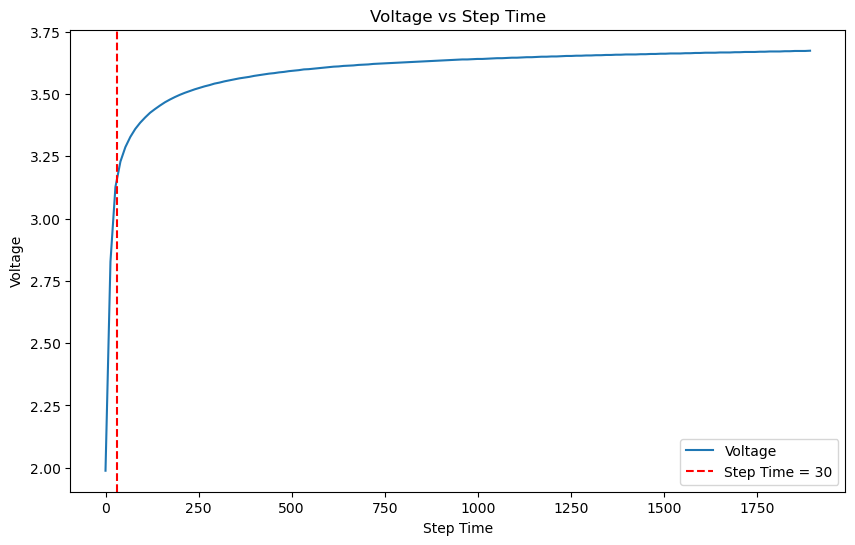

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(df_45_filtered6['Step_Time'], df_45_filtered6['Voltage'], label='Voltage')
plt.axvline(x=30, color='red', linestyle='--', label='Step Time = 30')
plt.xlabel('Step Time')
plt.ylabel('Voltage')
plt.title('Voltage vs Step Time')
plt.legend()
plt.show()

Okay, I think a time window of 30 seconds yields closer parameters to the full data parameters (vs. 60 seconds) because of the data it contains. There are way less data points per step in 30 second time window. The shorter window can give lower residuals for certain parameters simply because it’s fitting fewer data points or a more uniform portion of the curve. You can see that the 30 second window struggles to fit the b parameter. This is because b represents the growth rate and isn't able to see very much of the rebound. This doesn't necessarily mean that the 30 second window parameters will yield better predictions. 

In [25]:
# merge
df_45.head()

Source  Chemistry  Cell  Cycle  Step Cycle_Type      Time  Voltage  \
0   NASA        NaN  45.0    0.0   0.0  discharge  4348.625    1.990   
1   NASA        NaN  45.0    0.0   0.0  discharge  4361.860    2.766   
2   NASA        NaN  45.0    0.0   0.0  discharge  4375.172    3.030   
3   NASA        NaN  45.0    0.0   0.0  discharge  4388.438    3.139   
4   NASA        NaN  45.0    0.0   0.0  discharge  4401.750    3.206   

   Reference Capacity  Instantaneous Capacity  Charge_Capacity  \
0            4356.636               -4356.655              NaN   
1            4356.636               -4363.304              NaN   
2            4356.636               -4363.306              NaN   
3            4356.636               -4363.313              NaN   
4            4356.636               -4363.304              NaN   

   Discharge_Capacity  Temperature  Ambient_Temperature  Current Charge_Type  \
0                 NaN       15.636                  4.0   -1.005  Continuous   
1                 NaN       15.710                  4.0    0.000  Continuous   
2                 NaN       15.659                  4.0   -0.001  Continuous   
3                 NaN       15.495                  4.0   -0.001  Continuous   
4                 NaN       15.199                  4.0    0.001  Continuous   

   Step_Time  Current_Diff  
0      0.000           NaN  
1     13.235           NaN  
2     26.547           NaN  
3     39.813           NaN  
4     53.125           NaN

In [26]:
fitted_df.head(10)

Step  Time_Window_sec         L         A         x0         b
0   0.0               30  3.784006  1.794006  18.200941  0.851983
1   0.0               60  3.384803  1.394815  10.964803  1.208226
2   0.0              120  3.540956  1.551228  12.993815  0.935087
3   0.0              180  3.606426  1.616955  14.075012  0.845795
4   0.0              240  3.649808  1.660603  14.862318  0.791527
5   0.0              300  3.670034  1.681005  15.240944  0.766831
6   0.0              360  3.687040  1.698203  15.558734  0.746046
7   0.0              420  3.696038  1.707328  15.723230  0.734894
8   0.0              480  3.704695  1.716134  15.876441  0.723971
9   0.0              540  3.709682  1.721222  15.961190  0.717553

In [27]:
fitted_df.tail(10)

Step  Time_Window_sec         L         A         x0         b
760  180.0               60  3.401464  1.432464  11.055100  1.700668
761  180.0              120  3.539721  1.570921  11.686507  1.223172
762  180.0              180  3.622239  1.653766  12.232755  1.023584
763  180.0              240  3.677296  1.709138  12.665648  0.914757
764  180.0              300  3.713652  1.745755  12.975975  0.850995
765  180.0              360  3.737295  1.769604  13.181479  0.812119
766  180.0              420  3.752583  1.785050  13.310203  0.787676
767  180.0              480  3.762282  1.794869  13.385994  0.772235
768  180.0              540  3.768036  1.800706  13.426266  0.762978
769  180.0              600  3.771474  1.804201  13.446919  0.757332

In [28]:
# need to extract df for each time window / each step

In [29]:
filtered_df_30 = fitted_df.loc[fitted_df['Time_Window_sec'] == 30, ['Step', 'L', 'A', 'x0', 'b']]
filtered_df_30.head(10) 

Step         L         A         x0         b
0    0.0  3.784006  1.794006  18.200941  0.851983
11   4.0  3.184107  1.197107   9.733744  2.397092
22   6.0  3.232201  1.244201   9.791735  2.378526
33   8.0  3.238709  1.269709   9.808275  2.361966
44  10.0  3.311926  1.328926   9.720198  1.886580
55  12.0  3.406661  1.426661  10.076699  1.535409
66  16.0  3.249859  1.267859   9.680519  2.140291
77  20.0  3.305178  1.307178   9.747549  1.897792
88  22.0  3.302996  1.323996   9.694727  1.977524
99  24.0  3.284385  1.320385   9.830041  2.110031

In [30]:
# 60 
filtered_df_60 = fitted_df.loc[fitted_df['Time_Window_sec'] == 60, ['Step', 'L', 'A', 'x0', 'b']]
filtered_df_60.head(10) 

Step         L         A         x0         b
1     0.0  3.384803  1.394815  10.964803  1.208226
12    4.0  3.387944  1.400959  10.530423  1.382754
23    6.0  3.390364  1.402381  10.216914  1.515721
34    8.0  3.379569  1.410586  10.110922  1.568636
45   10.0  3.382131  1.399149   9.956479  1.572134
56   12.0  3.382312  1.402330   9.890455  1.591641
67   16.0  3.406489  1.424507  10.258023  1.429314
78   20.0  3.397500  1.399517  10.092861  1.500778
89   22.0  3.396954  1.417974   9.962087  1.539407
100  24.0  3.388718  1.424737  10.092778  1.585769

In [31]:
# 120
filtered_df_120 = fitted_df.loc[fitted_df['Time_Window_sec'] == 120, ['Step', 'L', 'A', 'x0', 'b']]
filtered_df_120.head(10) 

Step         L         A         x0         b
2     0.0  3.540956  1.551228  12.993815  0.935087
13    4.0  3.510232  1.523535  11.585284  1.079811
24    6.0  3.498386  1.510713  10.834471  1.172994
35    8.0  3.477645  1.508913  10.580435  1.232048
46   10.0  3.482527  1.499790  10.395401  1.219776
57   12.0  3.487431  1.507703  10.313170  1.215864
68   16.0  3.519424  1.537675  11.045047  1.122996
79   20.0  3.505768  1.508023  10.682899  1.160843
90   22.0  3.504197  1.525459  10.450008  1.183598
101  24.0  3.497846  1.534133  10.573328  1.210616

In [32]:
# 180
filtered_df_180 = fitted_df.loc[fitted_df['Time_Window_sec'] == 180, ['Step', 'L', 'A', 'x0', 'b']]
filtered_df_180.head(10) 

Step         L         A         x0         b
3     0.0  3.606426  1.616955  14.075012  0.845795
14    4.0  3.561561  1.575158  12.097068  0.974620
25    6.0  3.550482  1.563146  11.167523  1.038587
36    8.0  3.550897  1.582597  10.995562  1.035746
47   10.0  3.560469  1.578157  10.825082  1.013183
58   12.0  3.568458  1.589154  10.748297  1.003329
69   16.0  3.599823  1.618464  11.742000  0.954673
80   20.0  3.585812  1.588453  11.247221  0.972782
91   22.0  3.587516  1.609187  10.954031  0.979930
102  24.0  3.582549  1.619284  11.071210  0.997873

In [33]:
# merge with df_45 to add the ref capacity and max temp
# Perform a left join on 'Step' column
combo45 = pd.merge(df_45, filtered_df_30, how='left', on='Step')
combo45.head()

Source  Chemistry  Cell  Cycle  Step Cycle_Type      Time  Voltage  \
0   NASA        NaN  45.0    0.0   0.0  discharge  4348.625    1.990   
1   NASA        NaN  45.0    0.0   0.0  discharge  4361.860    2.766   
2   NASA        NaN  45.0    0.0   0.0  discharge  4375.172    3.030   
3   NASA        NaN  45.0    0.0   0.0  discharge  4388.438    3.139   
4   NASA        NaN  45.0    0.0   0.0  discharge  4401.750    3.206   

   Reference Capacity  Instantaneous Capacity  ...  Temperature  \
0            4356.636               -4356.655  ...       15.636   
1            4356.636               -4363.304  ...       15.710   
2            4356.636               -4363.306  ...       15.659   
3            4356.636               -4363.313  ...       15.495   
4            4356.636               -4363.304  ...       15.199   

   Ambient_Temperature  Current  Charge_Type  Step_Time Current_Diff  \
0                  4.0   -1.005   Continuous      0.000          NaN   
1                  4.0    0.000   Continuous     13.235          NaN   
2                  4.0   -0.001   Continuous     26.547          NaN   
3                  4.0   -0.001   Continuous     39.813          NaN   
4                  4.0    0.001   Continuous     53.125          NaN   

          L         A         x0         b  
0  3.784006  1.794006  18.200941  0.851983  
1  3.784006  1.794006  18.200941  0.851983  
2  3.784006  1.794006  18.200941  0.851983  
3  3.784006  1.794006  18.200941  0.851983  
4  3.784006  1.794006  18.200941  0.851983  

[5 rows x 22 columns]

In [34]:
combo45.tail()

Source  Chemistry  Cell  Cycle   Step Cycle_Type         Time  Voltage  \
9259   NASA        NaN  45.0   90.0  180.0  discharge  1113063.490    3.719   
9260   NASA        NaN  45.0   90.0  180.0  discharge  1113078.959    3.719   
9261   NASA        NaN  45.0   90.0  180.0  discharge  1113094.396    3.719   
9262   NASA        NaN  45.0   90.0  180.0  discharge  1113109.818    3.719   
9263   NASA        NaN  45.0   90.0  180.0  discharge  1113125.396    3.719   

      Reference Capacity  Instantaneous Capacity  ...  Temperature  \
9259            2687.613               -2696.403  ...        5.571   
9260            2687.613               -2696.417  ...        5.616   
9261            2687.613               -2696.425  ...        5.648   
9262            2687.613               -2696.436  ...        5.647   
9263            2687.613               -2696.446  ...        5.679   

      Ambient_Temperature  Current  Charge_Type  Step_Time Current_Diff  \
9259                  4.0   -0.002   Continuous   1698.094          NaN   
9260                  4.0   -0.001   Continuous   1713.563          NaN   
9261                  4.0   -0.001   Continuous   1729.000          NaN   
9262                  4.0   -0.002   Continuous   1744.422          NaN   
9263                  4.0   -0.001   Continuous   1760.000          NaN   

             L         A        x0         b  
9259  2.973673  1.004673  7.477739  3.138458  
9260  2.973673  1.004673  7.477739  3.138458  
9261  2.973673  1.004673  7.477739  3.138458  
9262  2.973673  1.004673  7.477739  3.138458  
9263  2.973673  1.004673  7.477739  3.138458  

[5 rows x 22 columns]

In [35]:
# 60
combo45_60 = pd.merge(df_45, filtered_df_60, how='left', on='Step')
combo45_60.head()

Source  Chemistry  Cell  Cycle  Step Cycle_Type      Time  Voltage  \
0   NASA        NaN  45.0    0.0   0.0  discharge  4348.625    1.990   
1   NASA        NaN  45.0    0.0   0.0  discharge  4361.860    2.766   
2   NASA        NaN  45.0    0.0   0.0  discharge  4375.172    3.030   
3   NASA        NaN  45.0    0.0   0.0  discharge  4388.438    3.139   
4   NASA        NaN  45.0    0.0   0.0  discharge  4401.750    3.206   

   Reference Capacity  Instantaneous Capacity  ...  Temperature  \
0            4356.636               -4356.655  ...       15.636   
1            4356.636               -4363.304  ...       15.710   
2            4356.636               -4363.306  ...       15.659   
3            4356.636               -4363.313  ...       15.495   
4            4356.636               -4363.304  ...       15.199   

   Ambient_Temperature  Current  Charge_Type  Step_Time Current_Diff  \
0                  4.0   -1.005   Continuous      0.000          NaN   
1                  4.0    0.000   Continuous     13.235          NaN   
2                  4.0   -0.001   Continuous     26.547          NaN   
3                  4.0   -0.001   Continuous     39.813          NaN   
4                  4.0    0.001   Continuous     53.125          NaN   

          L         A         x0         b  
0  3.384803  1.394815  10.964803  1.208226  
1  3.384803  1.394815  10.964803  1.208226  
2  3.384803  1.394815  10.964803  1.208226  
3  3.384803  1.394815  10.964803  1.208226  
4  3.384803  1.394815  10.964803  1.208226  

[5 rows x 22 columns]

In [36]:
# 120
combo45_120 = pd.merge(df_45, filtered_df_120, how='left', on='Step')
combo45_120.head()

Source  Chemistry  Cell  Cycle  Step Cycle_Type      Time  Voltage  \
0   NASA        NaN  45.0    0.0   0.0  discharge  4348.625    1.990   
1   NASA        NaN  45.0    0.0   0.0  discharge  4361.860    2.766   
2   NASA        NaN  45.0    0.0   0.0  discharge  4375.172    3.030   
3   NASA        NaN  45.0    0.0   0.0  discharge  4388.438    3.139   
4   NASA        NaN  45.0    0.0   0.0  discharge  4401.750    3.206   

   Reference Capacity  Instantaneous Capacity  ...  Temperature  \
0            4356.636               -4356.655  ...       15.636   
1            4356.636               -4363.304  ...       15.710   
2            4356.636               -4363.306  ...       15.659   
3            4356.636               -4363.313  ...       15.495   
4            4356.636               -4363.304  ...       15.199   

   Ambient_Temperature  Current  Charge_Type  Step_Time Current_Diff  \
0                  4.0   -1.005   Continuous      0.000          NaN   
1                  4.0    0.000   Continuous     13.235          NaN   
2                  4.0   -0.001   Continuous     26.547          NaN   
3                  4.0   -0.001   Continuous     39.813          NaN   
4                  4.0    0.001   Continuous     53.125          NaN   

          L         A         x0         b  
0  3.540956  1.551228  12.993815  0.935087  
1  3.540956  1.551228  12.993815  0.935087  
2  3.540956  1.551228  12.993815  0.935087  
3  3.540956  1.551228  12.993815  0.935087  
4  3.540956  1.551228  12.993815  0.935087  

[5 rows x 22 columns]

In [37]:
# 180
combo45_180 = pd.merge(df_45, filtered_df_180, how='left', on='Step')
combo45_180.head()

Source  Chemistry  Cell  Cycle  Step Cycle_Type      Time  Voltage  \
0   NASA        NaN  45.0    0.0   0.0  discharge  4348.625    1.990   
1   NASA        NaN  45.0    0.0   0.0  discharge  4361.860    2.766   
2   NASA        NaN  45.0    0.0   0.0  discharge  4375.172    3.030   
3   NASA        NaN  45.0    0.0   0.0  discharge  4388.438    3.139   
4   NASA        NaN  45.0    0.0   0.0  discharge  4401.750    3.206   

   Reference Capacity  Instantaneous Capacity  ...  Temperature  \
0            4356.636               -4356.655  ...       15.636   
1            4356.636               -4363.304  ...       15.710   
2            4356.636               -4363.306  ...       15.659   
3            4356.636               -4363.313  ...       15.495   
4            4356.636               -4363.304  ...       15.199   

   Ambient_Temperature  Current  Charge_Type  Step_Time Current_Diff  \
0                  4.0   -1.005   Continuous      0.000          NaN   
1                  4.0    0.000   Continuous     13.235          NaN   
2                  4.0   -0.001   Continuous     26.547          NaN   
3                  4.0   -0.001   Continuous     39.813          NaN   
4                  4.0    0.001   Continuous     53.125          NaN   

          L         A         x0         b  
0  3.606426  1.616955  14.075012  0.845795  
1  3.606426  1.616955  14.075012  0.845795  
2  3.606426  1.616955  14.075012  0.845795  
3  3.606426  1.616955  14.075012  0.845795  
4  3.606426  1.616955  14.075012  0.845795  

[5 rows x 22 columns]

In [38]:
combo45['Step'].nunique()

70

In [39]:
combo45['Max_Temp'] = combo45.groupby(['Step'])['Temperature'].transform('max')

In [40]:
# 60
combo45_60['Max_Temp'] = combo45_60.groupby(['Step'])['Temperature'].transform('max')

In [41]:
# 120
combo45_120['Max_Temp'] = combo45_120.groupby(['Step'])['Temperature'].transform('max')

In [42]:
# 180
combo45_180['Max_Temp'] = combo45_180.groupby(['Step'])['Temperature'].transform('max')

In [43]:
# Get unique Step and Rebound pairs
per_step = combo45[['Step', 'L', 'A', 'x0', 'b', 'Reference Capacity', 'Max_Temp', 'Ambient_Temperature']].drop_duplicates()
per_step.shape

(70, 8)

In [44]:
# 60
per_step_60 = combo45_60[['Step', 'L', 'A', 'x0', 'b', 'Reference Capacity', 'Max_Temp', 'Ambient_Temperature']].drop_duplicates()
per_step_60.shape

(70, 8)

In [45]:
# 120
per_step_120 = combo45_120[['Step', 'L', 'A', 'x0', 'b', 'Reference Capacity', 'Max_Temp', 'Ambient_Temperature']].drop_duplicates()
per_step_120.shape

(70, 8)

In [46]:
# 180
per_step_180 = combo45_180[['Step', 'L', 'A', 'x0', 'b', 'Reference Capacity', 'Max_Temp', 'Ambient_Temperature']].drop_duplicates()
per_step_180.shape

(70, 8)

In [47]:
per_step.head()

Step         L         A         x0         b  Reference Capacity  \
0     0.0  3.784006  1.794006  18.200941  0.851983            4356.636   
158   4.0  3.184107  1.197107   9.733744  2.397092            3856.567   
294   6.0  3.232201  1.244201   9.791735  2.378526            3703.252   
437   8.0  3.238709  1.269709   9.808275  2.361966            3594.173   
584  10.0  3.311926  1.328926   9.720198  1.886580            3506.276   

     Max_Temp  Ambient_Temperature  
0      15.710                  4.0  
158    16.327                  4.0  
294    16.190                  4.0  
437    16.445                  4.0  
584    16.652                  4.0

In [48]:
per_step_60.head()

Step         L         A         x0         b  Reference Capacity  \
0     0.0  3.384803  1.394815  10.964803  1.208226            4356.636   
158   4.0  3.387944  1.400959  10.530423  1.382754            3856.567   
294   6.0  3.390364  1.402381  10.216914  1.515721            3703.252   
437   8.0  3.379569  1.410586  10.110922  1.568636            3594.173   
584  10.0  3.382131  1.399149   9.956479  1.572134            3506.276   

     Max_Temp  Ambient_Temperature  
0      15.710                  4.0  
158    16.327                  4.0  
294    16.190                  4.0  
437    16.445                  4.0  
584    16.652                  4.0

In [49]:
per_step_120.head()

Step         L         A         x0         b  Reference Capacity  \
0     0.0  3.540956  1.551228  12.993815  0.935087            4356.636   
158   4.0  3.510232  1.523535  11.585284  1.079811            3856.567   
294   6.0  3.498386  1.510713  10.834471  1.172994            3703.252   
437   8.0  3.477645  1.508913  10.580435  1.232048            3594.173   
584  10.0  3.482527  1.499790  10.395401  1.219776            3506.276   

     Max_Temp  Ambient_Temperature  
0      15.710                  4.0  
158    16.327                  4.0  
294    16.190                  4.0  
437    16.445                  4.0  
584    16.652                  4.0

In [50]:
per_step_180.head()

Step         L         A         x0         b  Reference Capacity  \
0     0.0  3.606426  1.616955  14.075012  0.845795            4356.636   
158   4.0  3.561561  1.575158  12.097068  0.974620            3856.567   
294   6.0  3.550482  1.563146  11.167523  1.038587            3703.252   
437   8.0  3.550897  1.582597  10.995562  1.035746            3594.173   
584  10.0  3.560469  1.578157  10.825082  1.013183            3506.276   

     Max_Temp  Ambient_Temperature  
0      15.710                  4.0  
158    16.327                  4.0  
294    16.190                  4.0  
437    16.445                  4.0  
584    16.652                  4.0

In [51]:
#per_step.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa45_WORSTsubset30.csv', index = False)

In [52]:
#per_step_60.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa45_WORSTsubset60.csv', index = False)

In [53]:
#per_step_120.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa45_WORSTsubset120.csv', index = False)

In [54]:
#per_step_180.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa45_WORSTsubset180.csv', index = False)

In [55]:
# cell 47

In [56]:
######################################### anna code / modified
def logistic_like(x, L, A, x0, b):
    """
    Logistic-like function with four parameters.
    L: Asymptotic maximum value
    A: Scaling factor
    x0: Midpoint of the curve
    b: Growth rate
    """
    return L - A / (1 + (x / x0)**b)

# Dataframe to store fitted parameters
fitted_parameters = []

# Iterate over each unique step
for step in df_47['Step'].unique():
    step_data = df_47[df_47['Step'] == step].sort_values(by='Step_Time')
    # if len(step_data) < 20:  # Ensure subsets are meaningful
    #     print(f"Step {step} size is less than 20 points. Skipping.")
    #     continue
    
    x = step_data['Step_Time'].values
    y = step_data['Voltage'].values

    #if len(x) < 35:
        #print(f"Step {step}: Not enough points ({len(x)}). Skipping.")
        #continue

    # Initial guesses and bounds
    initial_guesses = [max(y), max(y) - min(y), np.median(x), 2]  # Guesses for [L, A, x0, b]
    lower_bounds = [0, 0, 0, 0]  # Set reasonable lower bounds
    upper_bounds = [np.inf, np.inf, np.inf, np.inf]  # Set reasonable upper bounds

    # Fit the curve
    try:
        params, _ = curve_fit(
            logistic_like, x, y,
            p0=initial_guesses,
            bounds=(lower_bounds, upper_bounds)
        )
        # Append the parameters with the step number
        fitted_parameters.append((step, params[0], params[1], params[2], params[3]))

    except RuntimeError:
        print(f"Fit could not be found for Step {step}")

# Convert fitted parameters to a DataFrame
fitted_df_nasa47 = pd.DataFrame(fitted_parameters, columns=['Step', 'L', 'A', 'x0', 'b'])
print(fitted_df_nasa47)
######################################### anna code

C:\Users\Worm\AppData\Local\Temp\ipykernel_47072\4065929506.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(


     Step         L         A         x0         b
0     0.0  3.637264  1.167378  29.551532  0.472484
1     4.0  3.274523  0.797523   7.814374  0.902817
2     6.0  3.282668  0.812668   7.706827  0.864059
3     8.0  3.389462  0.924469   9.224133  0.700137
4    10.0  3.481525  1.016539  11.784482  0.592785
..    ...       ...       ...        ...       ...
64  172.0  3.876423  1.394489  39.823002  0.495789
65  174.0  3.838211  1.354259  33.780812  0.505372
66  176.0  3.903198  1.422248  40.265323  0.484515
67  178.0  3.880417  1.405455  35.766104  0.493566
68  180.0  3.890877  1.391911  36.915639  0.488147

[69 rows x 5 columns]


In [57]:
avg_L = fitted_df_nasa47['L'].mean()
avg_A = fitted_df_nasa47['A'].mean()
avg_x0 = fitted_df_nasa47['x0'].mean()
avg_b = fitted_df_nasa47['b'].mean()

avg_dict = {
    'Average L': [avg_L],
    'Average A': [avg_A],
    'Average x0': [avg_x0],
    'Average b': [avg_b]
}

full_df_avg = pd.DataFrame(avg_dict)
print(full_df_avg)

   Average L  Average A  Average x0  Average b
0   3.971169   1.486879   56.580279   0.446507


In [58]:
time_windows = [30, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600]

for step in df_47['Step'].unique():
    step_data = df_47[df_47['Step'] == step].sort_values(by='Step_Time')
    
    # Iterate through each time window subset
    for window in time_windows:
        # Select subset of data for which Step_Time is within the current window
        subset_data = step_data[step_data['Step_Time'] <= window]
        print(len(subset_data))

3
5
9
14
18
20
20
20
20
20
20
3
4
4
4
4
4
4
4
4
4
4
3
4
4
4
4
4
4
4
4
4
4
3
5
6
6
6
6
6
6
6
6
6
3
5
7
7
7
7
7
7
7
7
7
3
5
9
9
9
9
9
9
9
9
9
3
5
9
9
9
9
9
9
9
9
9
3
5
9
13
13
13
13
13
13
13
13
3
5
9
14
14
14
14
14
14
14
14
3
5
9
14
15
15
15
15
15
15
15
3
5
9
14
16
16
16
16
16
16
16
3
5
9
13
17
17
17
17
17
17
17
3
5
9
12
12
12
12
12
12
12
12
3
5
9
13
16
16
16
16
16
16
16
3
5
9
13
17
17
17
17
17
17
17
3
5
9
13
16
16
16
16
16
16
16
3
5
9
13
18
19
19
19
19
19
19
3
5
9
13
18
20
20
20
20
20
20
3
5
9
13
17
21
21
21
21
21
21
3
5
9
13
17
22
26
27
27
27
27
3
5
9
13
17
22
23
23
23
23
23
3
5
9
13
17
22
22
22
22
22
22
3
5
9
13
17
22
24
24
24
24
24
3
5
9
13
17
22
22
22
22
22
22
3
5
9
13
17
22
24
24
24
24
24
3
5
9
13
17
21
23
23
23
23
23
3
5
9
13
17
21
23
23
23
23
23
3
5
9
13
17
21
24
24
24
24
24
3
5
9
13
17
21
22
22
22
22
22
3
5
9
13
17
21
22
22
22
22
22
3
5
9
13
17
21
23
23
23
23
23
3
5
9
13
17
21
22
22
22
22
22
3
5
9
13
16
16
16
16
16
16
16
3
5
9
13
17
20
20
20
20
20
20
3
5
9
13
17
18
18
18
18
18
1

In [59]:
def logistic_like(x, L, A, x0, b):
    """
    Logistic-like function with four parameters.
    L: Asymptotic maximum value
    A: Scaling factor
    x0: Midpoint of the curve
    b: Growth rate
    """
    return L - A / (1 + (x / x0)**b)

# Dataframe to store fitted parameters for each step and each time window
fitted_parameters = []

# Define time windows (in seconds). This list includes 30 sec, 1 min, 2 min, … up to 10 min.
time_windows = [30, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600]

# Iterate over each unique step
for step in df_47['Step'].unique():
    step_data = df_47[df_47['Step'] == step].sort_values(by='Step_Time')
    
    # Iterate through each time window subset
    for window in time_windows:
        # Select subset of data for which Step_Time is within the current window
        subset_data = step_data[step_data['Step_Time'] <= window]
        
        # Check that the subset has enough points to fit the model
        #if len(subset_data) < 4:
            #print(f"Step {step}, Window {window} sec: Not enough points ({len(subset_data)}). Skipping.")
            #continue
        
        x = subset_data['Step_Time'].values
        y = subset_data['Voltage'].values

        # Initial guesses for [L, A, x0, b] and bounds for the parameters
        initial_guesses = [max(y), max(y) - min(y), np.median(x), 2]
        lower_bounds = [0, 0, 0, 0]
        upper_bounds = [np.inf, np.inf, np.inf, np.inf]

        # Fit the logistic-like function to the subset data
        try:
            params, _ = curve_fit(
                logistic_like, x, y,
                p0=initial_guesses,
                bounds=(lower_bounds, upper_bounds)
            )
            # Append the fitted parameters with step number and time window
            fitted_parameters.append((step, window, params[0], params[1], params[2], params[3]))
        except RuntimeError:
            print(f"Fit could not be found for Step {step} with Window {window} sec.")

# Convert fitted parameters to a DataFrame for further analysis or inspection
fitted_df = pd.DataFrame(fitted_parameters, columns=['Step', 'Time_Window_sec', 'L', 'A', 'x0', 'b'])
print(fitted_df)

C:\Users\Worm\AppData\Local\Temp\ipykernel_47072\3166098337.py:41: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(


      Step  Time_Window_sec         L         A         x0         b
0      0.0               30  3.615940  1.145940  25.923399  0.548740
1      0.0               60  3.305169  0.835172   9.722404  0.793802
2      0.0              120  3.492184  1.022225  17.483730  0.564243
3      0.0              180  3.601002  1.131086  25.844387  0.492296
4      0.0              240  3.631999  1.162107  28.979766  0.475329
..     ...              ...       ...       ...        ...       ...
754  180.0              360  3.890877  1.391911  36.915639  0.488147
755  180.0              420  3.890877  1.391911  36.915639  0.488147
756  180.0              480  3.890877  1.391911  36.915639  0.488147
757  180.0              540  3.890877  1.391911  36.915639  0.488147
758  180.0              600  3.890877  1.391911  36.915639  0.488147

[759 rows x 6 columns]


In [60]:
fitted_df

Step  Time_Window_sec         L         A         x0         b
0      0.0               30  3.615940  1.145940  25.923399  0.548740
1      0.0               60  3.305169  0.835172   9.722404  0.793802
2      0.0              120  3.492184  1.022225  17.483730  0.564243
3      0.0              180  3.601002  1.131086  25.844387  0.492296
4      0.0              240  3.631999  1.162107  28.979766  0.475329
..     ...              ...       ...       ...        ...       ...
754  180.0              360  3.890877  1.391911  36.915639  0.488147
755  180.0              420  3.890877  1.391911  36.915639  0.488147
756  180.0              480  3.890877  1.391911  36.915639  0.488147
757  180.0              540  3.890877  1.391911  36.915639  0.488147
758  180.0              600  3.890877  1.391911  36.915639  0.488147

[759 rows x 6 columns]

In [61]:
# Group by the time window and compute mean values for each parameter
agg_df = (
    fitted_df
    .groupby('Time_Window_sec')
    .agg({'L': 'mean', 'A': 'mean', 'x0': 'mean', 'b': 'mean'})
    .reset_index()
)

agg_df.rename(
    columns={
        'L': 'Average L',
        'A': 'Average A',
        'x0': 'Average x0',
        'b': 'Average b'
    },
    inplace=True
)

print(agg_df)

    Time_Window_sec  Average L  Average A  Average x0  Average b
0                30   3.269367   0.785034    9.193035   1.884106
1                60   3.566878   1.082547   15.080978   0.632374
2               120   3.848340   1.364027   37.964525   0.483712
3               180   3.955634   1.471340   53.912764   0.450907
4               240   3.974063   1.489775   57.385860   0.445970
5               300   3.972798   1.488509   56.989169   0.446143
6               360   3.971236   1.486946   56.597051   0.446490
7               420   3.971169   1.486879   56.580279   0.446507
8               480   3.971169   1.486879   56.580279   0.446507
9               540   3.971169   1.486879   56.580279   0.446507
10              600   3.971169   1.486879   56.580279   0.446507


In [62]:
abs(3.269367 - 3.971169) / (3.971169) * 100

17.672428446132617

In [63]:
abs(3.566878 - 3.971169) / (3.971169) * 100

10.180654613288938

In [64]:
abs(3.971169 - 3.971169) / (3.971169) * 100 

0.0

In [65]:
# We'll calculate percent differences for these parameters:
parameters = ["Average L", "Average A", "Average x0", "Average b"]

# Create a new DataFrame that starts with the time window column
pct_diff_df = pd.DataFrame()
pct_diff_df["Time_Window_sec"] = agg_df["Time_Window_sec"]

# Loop over each parameter and calculate the % difference
for param in parameters:
    pct_diff_df[f"{param}_pct_diff"] = (
        abs(agg_df[param] - full_df_avg[param].iloc[0]) 
        / full_df_avg[param].iloc[0]
    ) * 100

print(pct_diff_df)

    Time_Window_sec  Average L_pct_diff  Average A_pct_diff  \
0                30           17.672433           47.202589   
1                60           10.180651           27.193381   
2               120            3.093020            8.262402   
3               180            0.391206            1.045105   
4               240            0.072870            0.194759   
5               300            0.041004            0.109607   
6               360            0.001687            0.004510   
7               420            0.000000            0.000000   
8               480            0.000000            0.000000   
9               540            0.000000            0.000000   
10              600            0.000000            0.000000   

    Average x0_pct_diff  Average b_pct_diff  
0          8.375223e+01        3.219660e+02  
1          7.334588e+01        4.162715e+01  
2          3.290149e+01        8.332579e+00  
3          4.714567e+00        9.856121e-01  
4          1.

In [66]:
# merge
df_47.head()

Source  Chemistry  Cell  Cycle  Step Cycle_Type      Time  Voltage  \
9264   NASA        NaN  47.0    0.0   0.0  discharge  6179.110    2.470   
9265   NASA        NaN  47.0    0.0   0.0  discharge  6192.656    2.942   
9266   NASA        NaN  47.0    0.0   0.0  discharge  6206.219    3.050   
9267   NASA        NaN  47.0    0.0   0.0  discharge  6219.719    3.100   
9268   NASA        NaN  47.0    0.0   0.0  discharge  6233.266    3.136   

      Reference Capacity  Instantaneous Capacity  Charge_Capacity  \
9264            6134.145               -6134.151              NaN   
9265            6134.145               -6140.894              NaN   
9266            6134.145               -6140.916              NaN   
9267            6134.145               -6140.947              NaN   
9268            6134.145               -6140.962              NaN   

      Discharge_Capacity  Temperature  Ambient_Temperature  Current  \
9264                 NaN       12.348                  4.0   -0.995   
9265                 NaN       12.376                  4.0   -0.001   
9266                 NaN       12.374                  4.0   -0.003   
9267                 NaN       12.251                  4.0   -0.002   
9268                 NaN       12.139                  4.0   -0.001   

     Charge_Type  Step_Time  Current_Diff  
9264  Continuous      0.000           NaN  
9265  Continuous     13.546           NaN  
9266  Continuous     27.109           NaN  
9267  Continuous     40.609           NaN  
9268  Continuous     54.156           NaN

In [67]:
fitted_df.head(10)

Step  Time_Window_sec         L         A         x0         b
0   0.0               30  3.615940  1.145940  25.923399  0.548740
1   0.0               60  3.305169  0.835172   9.722404  0.793802
2   0.0              120  3.492184  1.022225  17.483730  0.564243
3   0.0              180  3.601002  1.131086  25.844387  0.492296
4   0.0              240  3.631999  1.162107  28.979766  0.475329
5   0.0              300  3.637264  1.167378  29.551532  0.472484
6   0.0              360  3.637264  1.167378  29.551532  0.472484
7   0.0              420  3.637264  1.167378  29.551532  0.472484
8   0.0              480  3.637264  1.167378  29.551532  0.472484
9   0.0              540  3.637264  1.167378  29.551532  0.472484

In [68]:
fitted_df.tail(10)

Step  Time_Window_sec         L         A         x0         b
749  180.0               60  3.520912  1.021912  12.620086  0.720940
750  180.0              120  3.820443  1.321464  29.853430  0.515974
751  180.0              180  3.890877  1.391911  36.915639  0.488147
752  180.0              240  3.890877  1.391911  36.915639  0.488147
753  180.0              300  3.890877  1.391911  36.915639  0.488147
754  180.0              360  3.890877  1.391911  36.915639  0.488147
755  180.0              420  3.890877  1.391911  36.915639  0.488147
756  180.0              480  3.890877  1.391911  36.915639  0.488147
757  180.0              540  3.890877  1.391911  36.915639  0.488147
758  180.0              600  3.890877  1.391911  36.915639  0.488147

In [69]:
filtered_df_30 = fitted_df.loc[fitted_df['Time_Window_sec'] == 30, ['Step', 'L', 'A', 'x0', 'b']]
filtered_df_30.head(10)

Step         L         A         x0         b
0    0.0  3.615940  1.145940  25.923399  0.548740
11   4.0  3.235868  0.758868   7.288519  1.022468
22   6.0  3.187588  0.717588   6.780157  1.234308
33   8.0  3.208245  0.743245   6.754905  1.245988
44  10.0  3.203930  0.738930   6.662578  1.291886
55  12.0  3.232680  0.762680   6.601932  1.184058
66  16.0  3.214716  0.730716   6.751682  1.202732
77  20.0  3.237439  0.754439   6.555764  1.136109
88  22.0  3.216371  0.718371   6.531185  1.410058
99  24.0  3.210883  0.712883   6.464975  1.385059

In [70]:
filtered_df_60 = fitted_df.loc[fitted_df['Time_Window_sec'] == 60, ['Step', 'L', 'A', 'x0', 'b']]
filtered_df_60.head(10)

Step         L         A         x0         b
1     0.0  3.305169  0.835172   9.722404  0.793802
12    4.0  3.274523  0.797523   7.814374  0.902817
23    6.0  3.282668  0.812668   7.706827  0.864059
34    8.0  3.344563  0.879565   8.252692  0.779228
45   10.0  3.370740  0.905743   8.578086  0.735824
56   12.0  3.394868  0.924871   8.700693  0.714533
67   16.0  3.393151  0.909153   9.472306  0.695319
78   20.0  3.447653  0.964655  10.256365  0.640579
89   22.0  3.444861  0.946862   9.387306  0.656669
100  24.0  3.521440  1.023441  12.278423  0.569344

In [71]:
filtered_df_120 = fitted_df.loc[fitted_df['Time_Window_sec'] == 120, ['Step', 'L', 'A', 'x0', 'b']]
filtered_df_120.head(10)

Step         L         A         x0         b
2     0.0  3.492184  1.022225  17.483730  0.564243
13    4.0  3.274523  0.797523   7.814374  0.902817
24    6.0  3.282668  0.812668   7.706827  0.864059
35    8.0  3.389462  0.924469   9.224133  0.700137
46   10.0  3.481525  1.016539  11.784482  0.592785
57   12.0  3.598374  1.128402  16.367885  0.508579
68   16.0  3.618083  1.134109  19.968922  0.492462
79   20.0  3.664955  1.181977  21.374770  0.476066
90   22.0  3.686130  1.188153  21.204465  0.466003
101  24.0  3.777034  1.279050  30.679912  0.432367

In [72]:
filtered_df_180 = fitted_df.loc[fitted_df['Time_Window_sec'] == 180, ['Step', 'L', 'A', 'x0', 'b']]
filtered_df_180.head(10)

Step         L         A         x0         b
3     0.0  3.601002  1.131086  25.844387  0.492296
14    4.0  3.274523  0.797523   7.814374  0.902817
25    6.0  3.282668  0.812668   7.706827  0.864059
36    8.0  3.389462  0.924469   9.224133  0.700137
47   10.0  3.481525  1.016539  11.784482  0.592785
58   12.0  3.598374  1.128402  16.367885  0.508579
69   16.0  3.618083  1.134109  19.968922  0.492462
80   20.0  3.803936  1.320984  35.573388  0.418776
91   22.0  3.854550  1.356603  39.729163  0.400806
102  24.0  3.980384  1.482426  64.733286  0.375729

In [73]:
filtered_df_30.tail(10)

Step         L         A        x0         b
649  156.0  3.096022  0.598022  7.524274  3.141079
660  158.0  3.103699  0.605699  7.571716  3.143923
671  160.0  3.096150  0.625150  7.553680  3.129667
682  162.0  3.108216  0.611216  7.571414  3.144979
693  168.0  3.059036  0.584036  7.617629  3.129662
704  172.0  3.073384  0.591384  7.623765  3.139446
715  174.0  3.086360  0.602360  7.670868  3.142963
726  176.0  3.086733  0.605733  7.624895  3.142509
737  178.0  3.094276  0.619276  7.685949  3.137120
748  180.0  3.107863  0.608863  7.679882  3.147768

In [74]:
combo47 = pd.merge(df_47, filtered_df_30, how='left', on='Step')
combo47.head()

Source  Chemistry  Cell  Cycle  Step Cycle_Type      Time  Voltage  \
0   NASA        NaN  47.0    0.0   0.0  discharge  6179.110    2.470   
1   NASA        NaN  47.0    0.0   0.0  discharge  6192.656    2.942   
2   NASA        NaN  47.0    0.0   0.0  discharge  6206.219    3.050   
3   NASA        NaN  47.0    0.0   0.0  discharge  6219.719    3.100   
4   NASA        NaN  47.0    0.0   0.0  discharge  6233.266    3.136   

   Reference Capacity  Instantaneous Capacity  ...  Temperature  \
0            6134.145               -6134.151  ...       12.348   
1            6134.145               -6140.894  ...       12.376   
2            6134.145               -6140.916  ...       12.374   
3            6134.145               -6140.947  ...       12.251   
4            6134.145               -6140.962  ...       12.139   

   Ambient_Temperature  Current  Charge_Type  Step_Time Current_Diff        L  \
0                  4.0   -0.995   Continuous      0.000          NaN  3.61594   
1                  4.0   -0.001   Continuous     13.546          NaN  3.61594   
2                  4.0   -0.003   Continuous     27.109          NaN  3.61594   
3                  4.0   -0.002   Continuous     40.609          NaN  3.61594   
4                  4.0   -0.001   Continuous     54.156          NaN  3.61594   

         A         x0        b  
0  1.14594  25.923399  0.54874  
1  1.14594  25.923399  0.54874  
2  1.14594  25.923399  0.54874  
3  1.14594  25.923399  0.54874  
4  1.14594  25.923399  0.54874  

[5 rows x 22 columns]

In [75]:
combo47_60 = pd.merge(df_47, filtered_df_60, how='left', on='Step')
combo47_60.head()

Source  Chemistry  Cell  Cycle  Step Cycle_Type      Time  Voltage  \
0   NASA        NaN  47.0    0.0   0.0  discharge  6179.110    2.470   
1   NASA        NaN  47.0    0.0   0.0  discharge  6192.656    2.942   
2   NASA        NaN  47.0    0.0   0.0  discharge  6206.219    3.050   
3   NASA        NaN  47.0    0.0   0.0  discharge  6219.719    3.100   
4   NASA        NaN  47.0    0.0   0.0  discharge  6233.266    3.136   

   Reference Capacity  Instantaneous Capacity  ...  Temperature  \
0            6134.145               -6134.151  ...       12.348   
1            6134.145               -6140.894  ...       12.376   
2            6134.145               -6140.916  ...       12.374   
3            6134.145               -6140.947  ...       12.251   
4            6134.145               -6140.962  ...       12.139   

   Ambient_Temperature  Current  Charge_Type  Step_Time Current_Diff  \
0                  4.0   -0.995   Continuous      0.000          NaN   
1                  4.0   -0.001   Continuous     13.546          NaN   
2                  4.0   -0.003   Continuous     27.109          NaN   
3                  4.0   -0.002   Continuous     40.609          NaN   
4                  4.0   -0.001   Continuous     54.156          NaN   

          L         A        x0         b  
0  3.305169  0.835172  9.722404  0.793802  
1  3.305169  0.835172  9.722404  0.793802  
2  3.305169  0.835172  9.722404  0.793802  
3  3.305169  0.835172  9.722404  0.793802  
4  3.305169  0.835172  9.722404  0.793802  

[5 rows x 22 columns]

In [76]:
combo47_120 = pd.merge(df_47, filtered_df_120, how='left', on='Step')
combo47_120.head()

Source  Chemistry  Cell  Cycle  Step Cycle_Type      Time  Voltage  \
0   NASA        NaN  47.0    0.0   0.0  discharge  6179.110    2.470   
1   NASA        NaN  47.0    0.0   0.0  discharge  6192.656    2.942   
2   NASA        NaN  47.0    0.0   0.0  discharge  6206.219    3.050   
3   NASA        NaN  47.0    0.0   0.0  discharge  6219.719    3.100   
4   NASA        NaN  47.0    0.0   0.0  discharge  6233.266    3.136   

   Reference Capacity  Instantaneous Capacity  ...  Temperature  \
0            6134.145               -6134.151  ...       12.348   
1            6134.145               -6140.894  ...       12.376   
2            6134.145               -6140.916  ...       12.374   
3            6134.145               -6140.947  ...       12.251   
4            6134.145               -6140.962  ...       12.139   

   Ambient_Temperature  Current  Charge_Type  Step_Time Current_Diff  \
0                  4.0   -0.995   Continuous      0.000          NaN   
1                  4.0   -0.001   Continuous     13.546          NaN   
2                  4.0   -0.003   Continuous     27.109          NaN   
3                  4.0   -0.002   Continuous     40.609          NaN   
4                  4.0   -0.001   Continuous     54.156          NaN   

          L         A        x0         b  
0  3.492184  1.022225  17.48373  0.564243  
1  3.492184  1.022225  17.48373  0.564243  
2  3.492184  1.022225  17.48373  0.564243  
3  3.492184  1.022225  17.48373  0.564243  
4  3.492184  1.022225  17.48373  0.564243  

[5 rows x 22 columns]

In [77]:
combo47_180 = pd.merge(df_47, filtered_df_180, how='left', on='Step')
combo47_180.head()

Source  Chemistry  Cell  Cycle  Step Cycle_Type      Time  Voltage  \
0   NASA        NaN  47.0    0.0   0.0  discharge  6179.110    2.470   
1   NASA        NaN  47.0    0.0   0.0  discharge  6192.656    2.942   
2   NASA        NaN  47.0    0.0   0.0  discharge  6206.219    3.050   
3   NASA        NaN  47.0    0.0   0.0  discharge  6219.719    3.100   
4   NASA        NaN  47.0    0.0   0.0  discharge  6233.266    3.136   

   Reference Capacity  Instantaneous Capacity  ...  Temperature  \
0            6134.145               -6134.151  ...       12.348   
1            6134.145               -6140.894  ...       12.376   
2            6134.145               -6140.916  ...       12.374   
3            6134.145               -6140.947  ...       12.251   
4            6134.145               -6140.962  ...       12.139   

   Ambient_Temperature  Current  Charge_Type  Step_Time Current_Diff  \
0                  4.0   -0.995   Continuous      0.000          NaN   
1                  4.0   -0.001   Continuous     13.546          NaN   
2                  4.0   -0.003   Continuous     27.109          NaN   
3                  4.0   -0.002   Continuous     40.609          NaN   
4                  4.0   -0.001   Continuous     54.156          NaN   

          L         A         x0         b  
0  3.601002  1.131086  25.844387  0.492296  
1  3.601002  1.131086  25.844387  0.492296  
2  3.601002  1.131086  25.844387  0.492296  
3  3.601002  1.131086  25.844387  0.492296  
4  3.601002  1.131086  25.844387  0.492296  

[5 rows x 22 columns]

In [78]:
combo47.tail()

Source  Chemistry  Cell  Cycle   Step Cycle_Type         Time  Voltage  \
1107   NASA        NaN  47.0   90.0  180.0  discharge  1113063.490    3.317   
1108   NASA        NaN  47.0   90.0  180.0  discharge  1113078.959    3.347   
1109   NASA        NaN  47.0   90.0  180.0  discharge  1113094.396    3.373   
1110   NASA        NaN  47.0   90.0  180.0  discharge  1113109.818    3.395   
1111   NASA        NaN  47.0   90.0  180.0  discharge  1113125.396    3.414   

      Reference Capacity  Instantaneous Capacity  ...  Temperature  \
1107            4270.473               -4278.256  ...       11.655   
1108            4270.473               -4278.292  ...       11.537   
1109            4270.473               -4278.338  ...       11.455   
1110            4270.473               -4278.398  ...       11.292   
1111            4270.473               -4278.432  ...       11.180   

      Ambient_Temperature  Current  Charge_Type  Step_Time Current_Diff  \
1107                  4.0   -0.003   Continuous     77.078          NaN   
1108                  4.0   -0.002   Continuous     92.547          NaN   
1109                  4.0   -0.005   Continuous    107.984          NaN   
1110                  4.0   -0.004   Continuous    123.406          NaN   
1111                  4.0   -0.002   Continuous    138.984          NaN   

             L         A        x0         b  
1107  3.107863  0.608863  7.679882  3.147768  
1108  3.107863  0.608863  7.679882  3.147768  
1109  3.107863  0.608863  7.679882  3.147768  
1110  3.107863  0.608863  7.679882  3.147768  
1111  3.107863  0.608863  7.679882  3.147768  

[5 rows x 22 columns]

In [79]:
combo47['Max_Temp'] = combo47.groupby(['Step'])['Temperature'].transform('max')

In [80]:
combo47_60['Max_Temp'] = combo47_60.groupby(['Step'])['Temperature'].transform('max')

In [81]:
combo47_120['Max_Temp'] = combo47_120.groupby(['Step'])['Temperature'].transform('max')

In [82]:
combo47_180['Max_Temp'] = combo47_180.groupby(['Step'])['Temperature'].transform('max')

In [83]:
# Get unique Step and Rebound pairs
per_step = combo47[['Step', 'L', 'A', 'x0', 'b', 'Reference Capacity', 'Max_Temp', 'Ambient_Temperature']].drop_duplicates()
per_step.shape

(69, 8)

In [84]:
per_step_60 = combo47_60[['Step', 'L', 'A', 'x0', 'b', 'Reference Capacity', 'Max_Temp', 'Ambient_Temperature']].drop_duplicates()
per_step_60.shape

(69, 8)

In [85]:
per_step_120 = combo47_120[['Step', 'L', 'A', 'x0', 'b', 'Reference Capacity', 'Max_Temp', 'Ambient_Temperature']].drop_duplicates()
per_step_120.shape

(69, 8)

In [86]:
per_step_180 = combo47_180[['Step', 'L', 'A', 'x0', 'b', 'Reference Capacity', 'Max_Temp', 'Ambient_Temperature']].drop_duplicates()
per_step_180.shape

(69, 8)

In [87]:
per_step.head()

Step         L         A         x0         b  Reference Capacity  \
0    0.0  3.615940  1.145940  25.923399  0.548740            6134.145   
20   4.0  3.235868  0.758868   7.288519  1.022468            5567.881   
24   6.0  3.187588  0.717588   6.780157  1.234308            5509.463   
28   8.0  3.208245  0.743245   6.754905  1.245988            5434.950   
34  10.0  3.203930  0.738930   6.662578  1.291886            5375.908   

    Max_Temp  Ambient_Temperature  
0     12.376                  4.0  
20    10.903                  4.0  
24    10.557                  4.0  
28    10.589                  4.0  
34    11.020                  4.0

In [88]:
per_step_120.head()

Step         L         A         x0         b  Reference Capacity  \
0    0.0  3.492184  1.022225  17.483730  0.564243            6134.145   
20   4.0  3.274523  0.797523   7.814374  0.902817            5567.881   
24   6.0  3.282668  0.812668   7.706827  0.864059            5509.463   
28   8.0  3.389462  0.924469   9.224133  0.700137            5434.950   
34  10.0  3.481525  1.016539  11.784482  0.592785            5375.908   

    Max_Temp  Ambient_Temperature  
0     12.376                  4.0  
20    10.903                  4.0  
24    10.557                  4.0  
28    10.589                  4.0  
34    11.020                  4.0

In [89]:
combo47['Step'].nunique()

69

In [90]:
#per_step.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa47_WORSTsubset30.csv', index = False)

In [91]:
#per_step_60.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa47_WORSTsubset60.csv', index = False)

In [92]:
#per_step_120.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa47_WORSTsubset120.csv', index = False)

In [93]:
#per_step_180.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa47_WORSTsubset180.csv', index = False)

In [94]:
# cell 48

In [95]:
######################################### anna code / modified
def logistic_like(x, L, A, x0, b):
    """
    Logistic-like function with four parameters.
    L: Asymptotic maximum value
    A: Scaling factor
    x0: Midpoint of the curve
    b: Growth rate
    """
    return L - A / (1 + (x / x0)**b)

# Dataframe to store fitted parameters
fitted_parameters = []

# Iterate over each unique step
for step in df_48['Step'].unique():
    step_data = df_48[df_48['Step'] == step].sort_values(by='Step_Time')
    # if len(step_data) < 20:  # Ensure subsets are meaningful
    #     print(f"Step {step} size is less than 20 points. Skipping.")
    #     continue
    
    x = step_data['Step_Time'].values
    y = step_data['Voltage'].values

    #if len(x) < 35:
        #print(f"Step {step}: Not enough points ({len(x)}). Skipping.")
        #continue

    # Initial guesses and bounds
    initial_guesses = [max(y), max(y) - min(y), np.median(x), 2]  # Guesses for [L, A, x0, b]
    lower_bounds = [0, 0, 0, 0]  # Set reasonable lower bounds
    upper_bounds = [np.inf, np.inf, np.inf, np.inf]  # Set reasonable upper bounds

    # Fit the curve
    try:
        params, _ = curve_fit(
            logistic_like, x, y,
            p0=initial_guesses,
            bounds=(lower_bounds, upper_bounds)
        )
        # Append the parameters with the step number
        fitted_parameters.append((step, params[0], params[1], params[2], params[3]))

    except RuntimeError:
        print(f"Fit could not be found for Step {step}")

# Convert fitted parameters to a DataFrame
fitted_df_nasa48 = pd.DataFrame(fitted_parameters, columns=['Step', 'L', 'A', 'x0', 'b'])
print(fitted_df_nasa48)
######################################### anna code

     Step         L         A         x0         b
0     0.0  3.839351  1.152308  55.309675  0.373361
1     4.0  3.803510  1.120530  46.105152  0.363143
2     6.0  3.862455  1.186472  60.795660  0.351806
3     8.0  3.911328  1.218349  63.277631  0.334411
4    10.0  3.977994  1.282013  75.648198  0.327150
..    ...       ...       ...        ...       ...
63  168.0  4.053143  1.367157  90.792453  0.425636
64  172.0  3.761847  1.062848  29.368878  0.507540
65  174.0  3.198999  0.508999   0.308223  5.962126
66  176.0  3.190154  0.506154   7.791413  3.232986
67  180.0  3.207044  0.517044   7.870066  3.238898

[68 rows x 5 columns]


C:\Users\Worm\AppData\Local\Temp\ipykernel_47072\950885987.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(


In [96]:
avg_L = fitted_df_nasa48['L'].mean()
avg_A = fitted_df_nasa48['A'].mean()
avg_x0 = fitted_df_nasa48['x0'].mean()
avg_b = fitted_df_nasa48['b'].mean()

avg_dict = {
    'Average L': [avg_L],
    'Average A': [avg_A],
    'Average x0': [avg_x0],
    'Average b': [avg_b]
}

full_df_avg = pd.DataFrame(avg_dict)
print(full_df_avg)

   Average L  Average A  Average x0  Average b
0    4.02136   1.333035   89.334399   0.558623


In [97]:
time_windows = [30, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600]

for step in df_48['Step'].unique():
    step_data = df_48[df_48['Step'] == step].sort_values(by='Step_Time')
    
    # Iterate through each time window subset
    for window in time_windows:
        # Select subset of data for which Step_Time is within the current window
        subset_data = step_data[step_data['Step_Time'] <= window]
        print(len(subset_data))

3
5
9
14
18
23
27
32
33
33
33
3
5
9
14
15
15
15
15
15
15
15
3
5
9
13
13
13
13
13
13
13
13
3
5
9
14
15
15
15
15
15
15
15
3
5
9
14
16
16
16
16
16
16
16
3
5
9
14
16
16
16
16
16
16
16
3
5
9
14
15
15
15
15
15
15
15
3
5
9
14
18
18
18
18
18
18
18
3
5
9
14
17
17
17
17
17
17
17
3
5
9
14
18
18
18
18
18
18
18
3
5
9
14
18
18
18
18
18
18
18
3
5
9
14
18
20
20
20
20
20
20
3
5
9
13
17
17
17
17
17
17
17
3
5
9
13
18
20
20
20
20
20
20
3
5
9
13
18
20
20
20
20
20
20
3
5
9
13
18
18
18
18
18
18
18
3
5
9
13
18
20
20
20
20
20
20
3
5
9
13
18
22
22
22
22
22
22
3
5
9
13
17
22
22
22
22
22
22
3
5
9
13
17
22
26
27
27
27
27
3
5
9
13
17
22
24
24
24
24
24
3
5
9
13
17
22
22
22
22
22
22
3
5
9
13
17
22
24
24
24
24
24
3
5
9
13
17
21
21
21
21
21
21
3
5
9
13
17
22
23
23
23
23
23
3
5
9
13
17
21
21
21
21
21
21
3
5
9
13
17
20
20
20
20
20
20
3
5
9
13
17
21
22
22
22
22
22
3
5
9
13
17
19
19
19
19
19
19
3
5
9
13
17
20
20
20
20
20
20
3
5
9
13
17
21
21
21
21
21
21
3
5
9
13
17
18
18
18
18
18
18
3
5
9
13
14
14
14
14
14
14
14
3
5
9
13
1

In [98]:
def logistic_like(x, L, A, x0, b):
    """
    Logistic-like function with four parameters.
    L: Asymptotic maximum value
    A: Scaling factor
    x0: Midpoint of the curve
    b: Growth rate
    """
    return L - A / (1 + (x / x0)**b)

# Dataframe to store fitted parameters for each step and each time window
fitted_parameters = []

# Define time windows (in seconds). This list includes 30 sec, 1 min, 2 min, … up to 10 min.
time_windows = [30, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600]

# Iterate over each unique step
for step in df_48['Step'].unique():
    step_data = df_48[df_48['Step'] == step].sort_values(by='Step_Time')
    
    # Iterate through each time window subset
    for window in time_windows:
        # Select subset of data for which Step_Time is within the current window
        subset_data = step_data[step_data['Step_Time'] <= window]
        
        # Check that the subset has enough points to fit the model
        #if len(subset_data) < 2:
            #print(f"Step {step}, Window {window} sec: Not enough points ({len(subset_data)}). Skipping.")
            #continue
        
        x = subset_data['Step_Time'].values
        y = subset_data['Voltage'].values

        # Initial guesses for [L, A, x0, b] and bounds for the parameters
        initial_guesses = [max(y), max(y) - min(y), np.median(x), 2]
        lower_bounds = [0, 0, 0, 0]
        upper_bounds = [np.inf, np.inf, np.inf, np.inf]

        # Fit the logistic-like function to the subset data
        try:
            params, _ = curve_fit(
                logistic_like, x, y,
                p0=initial_guesses,
                bounds=(lower_bounds, upper_bounds)
            )
            # Append the fitted parameters with step number and time window
            fitted_parameters.append((step, window, params[0], params[1], params[2], params[3]))
        except RuntimeError:
            print(f"Fit could not be found for Step {step} with Window {window} sec.")

# Convert fitted parameters to a DataFrame for further analysis or inspection
fitted_df = pd.DataFrame(fitted_parameters, columns=['Step', 'Time_Window_sec', 'L', 'A', 'x0', 'b'])
print(fitted_df)

C:\Users\Worm\AppData\Local\Temp\ipykernel_47072\2819490483.py:41: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(


      Step  Time_Window_sec         L         A         x0         b
0      0.0               30  3.189481  0.502481  10.654134  7.539961
1      0.0               60  3.520319  0.833320  12.182287  0.523889
2      0.0              120  3.789445  1.102455  43.850412  0.383386
3      0.0              180  3.929024  1.242044  84.702895  0.346994
4      0.0              240  3.919993  1.233012  81.192413  0.349131
..     ...              ...       ...       ...        ...       ...
743  180.0              360  3.207044  0.517044   7.870066  3.238898
744  180.0              420  3.207044  0.517044   7.870066  3.238898
745  180.0              480  3.207044  0.517044   7.870066  3.238898
746  180.0              540  3.207044  0.517044   7.870066  3.238898
747  180.0              600  3.207044  0.517044   7.870066  3.238898

[748 rows x 6 columns]


In [99]:
fitted_df

Step  Time_Window_sec         L         A         x0         b
0      0.0               30  3.189481  0.502481  10.654134  7.539961
1      0.0               60  3.520319  0.833320  12.182287  0.523889
2      0.0              120  3.789445  1.102455  43.850412  0.383386
3      0.0              180  3.929024  1.242044  84.702895  0.346994
4      0.0              240  3.919993  1.233012  81.192413  0.349131
..     ...              ...       ...       ...        ...       ...
743  180.0              360  3.207044  0.517044   7.870066  3.238898
744  180.0              420  3.207044  0.517044   7.870066  3.238898
745  180.0              480  3.207044  0.517044   7.870066  3.238898
746  180.0              540  3.207044  0.517044   7.870066  3.238898
747  180.0              600  3.207044  0.517044   7.870066  3.238898

[748 rows x 6 columns]

In [100]:
# Group by the time window and compute mean values for each parameter
agg_df = (
    fitted_df
    .groupby('Time_Window_sec')
    .agg({'L': 'mean', 'A': 'mean', 'x0': 'mean', 'b': 'mean'})
    .reset_index()
)

agg_df.rename(
    columns={
        'L': 'Average L',
        'A': 'Average A',
        'x0': 'Average x0',
        'b': 'Average b'
    },
    inplace=True
)

print(agg_df)

    Time_Window_sec  Average L  Average A  Average x0  Average b
0                30   3.261548   0.573224    7.983979   2.979891
1                60   3.769583   1.081260   32.763087   0.630118
2               120   4.006494   1.318176   86.476953   0.562379
3               180   4.048129   1.359814  101.661403   0.553599
4               240   4.035954   1.347636   95.497084   0.555606
5               300   4.023860   1.335536   90.208233   0.557976
6               360   4.021991   1.333666   89.524910   0.558422
7               420   4.021440   1.333115   89.355817   0.558594
8               480   4.021360   1.333035   89.334399   0.558623
9               540   4.021360   1.333035   89.334399   0.558623
10              600   4.021360   1.333035   89.334399   0.558623


In [101]:
# We'll calculate percent differences for these parameters:
parameters = ["Average L", "Average A", "Average x0", "Average b"]

# Create a new DataFrame that starts with the time window column
pct_diff_df = pd.DataFrame()
pct_diff_df["Time_Window_sec"] = agg_df["Time_Window_sec"]

# Loop over each parameter and calculate the % difference
for param in parameters:
    pct_diff_df[f"{param}_pct_diff"] = (
        abs(agg_df[param] - full_df_avg[param].iloc[0]) 
        / full_df_avg[param].iloc[0]
    ) * 100

print(pct_diff_df)

    Time_Window_sec  Average L_pct_diff  Average A_pct_diff  \
0                30        1.889441e+01           56.998554   
1                60        6.260993e+00           18.887341   
2               120        3.696781e-01            1.114670   
3               180        6.656748e-01            2.008867   
4               240        3.629129e-01            1.095323   
5               300        6.215098e-02            0.187646   
6               360        1.567498e-02            0.047340   
7               420        1.987185e-03            0.006003   
8               480        2.208652e-14            0.000000   
9               540        2.208652e-14            0.000000   
10              600        2.208652e-14            0.000000   

    Average x0_pct_diff  Average b_pct_diff  
0             91.062816          433.434939  
1             63.325340           12.798391  
2              3.198595            0.672431  
3             13.798721            0.899397  
4            

In [102]:
filtered_df_30 = fitted_df.loc[fitted_df['Time_Window_sec'] == 30, ['Step', 'L', 'A', 'x0', 'b']]
filtered_df_30.head(10) 

Step         L         A         x0         b
0    0.0  3.189481  0.502481  10.654134  7.539961
11   4.0  3.196249  0.513249   9.183031  4.437607
22   6.0  3.192315  0.516315   9.133676  4.418478
33   8.0  3.221367  0.528367  10.010976  5.998248
44  10.0  3.234113  0.538113  11.177157  9.572193
55  12.0  3.231280  0.546280  10.119313  6.157812
66  16.0  3.206420  0.515420   9.141750  4.367655
77  20.0  3.224444  0.535444   9.250228  4.422510
88  22.0  3.226462  0.541462   9.248399  4.430741
99  24.0  3.226393  0.537393   9.348481  4.468603

In [103]:
filtered_df_60 = fitted_df.loc[fitted_df['Time_Window_sec'] == 60, ['Step', 'L', 'A', 'x0', 'b']]
filtered_df_60.head(10)

Step         L         A         x0         b
1     0.0  3.520319  0.833320  12.182287  0.523889
12    4.0  3.510824  0.827825  11.035360  0.520166
23    6.0  3.520499  0.844500  11.638199  0.510898
34    8.0  3.515397  0.822398   9.200245  0.533855
45   10.0  3.563584  0.867584  10.334459  0.504985
56   12.0  3.580416  0.895417  11.177983  0.495824
67   16.0  3.673165  0.982165  22.603135  0.430969
78   20.0  3.696103  1.007104  21.352819  0.433604
89   22.0  3.633244  0.948245  15.580723  0.470580
100  24.0  3.710070  1.021071  22.499651  0.439575

In [104]:
filtered_df_120 = fitted_df.loc[fitted_df['Time_Window_sec'] == 120, ['Step', 'L', 'A', 'x0', 'b']]
filtered_df_120.head(10)

Step         L         A          x0         b
2     0.0  3.789445  1.102455   43.850412  0.383386
13    4.0  3.687878  1.004886   25.867676  0.406522
24    6.0  3.747290  1.071298   34.676042  0.386390
35    8.0  3.749923  1.056933   28.233815  0.383503
46   10.0  3.816020  1.120029   34.456403  0.369389
57   12.0  3.857117  1.172126   40.918200  0.362924
68   16.0  3.997629  1.306635  101.768309  0.339850
79   20.0  3.958935  1.269941   70.858407  0.352956
90   22.0  3.947489  1.262498   65.111700  0.355640
101  24.0  4.099069  1.410077  122.028570  0.337659

In [105]:
filtered_df_180 = fitted_df.loc[fitted_df['Time_Window_sec'] == 180, ['Step', 'L', 'A', 'x0', 'b']]
filtered_df_180.head(10)

Step         L         A          x0         b
3     0.0  3.929024  1.242044   84.702895  0.346994
14    4.0  3.796435  1.113454   44.500270  0.365434
25    6.0  3.862455  1.186472   60.795660  0.351806
36    8.0  3.905229  1.212249   61.389385  0.335914
47   10.0  3.974212  1.278230   74.286282  0.327968
58   12.0  4.004581  1.319598   81.793831  0.327796
69   16.0  4.060506  1.369515  133.962178  0.329282
80   20.0  4.089490  1.400501  125.090699  0.328770
91   22.0  4.090002  1.405019  121.273581  0.328318
102  24.0  4.201105  1.512118  183.872813  0.323078

In [106]:
combo48 = pd.merge(df_48, filtered_df_30, how='left', on='Step')
combo48.head()

Source  Chemistry  Cell  Cycle  Step Cycle_Type      Time  Voltage  \
0   NASA        NaN  48.0    0.0   0.0  discharge  6004.953    2.687   
1   NASA        NaN  48.0    0.0   0.0  discharge  6018.360    3.114   
2   NASA        NaN  48.0    0.0   0.0  discharge  6031.735    3.189   
3   NASA        NaN  48.0    0.0   0.0  discharge  6045.141    3.229   
4   NASA        NaN  48.0    0.0   0.0  discharge  6058.500    3.258   

   Reference Capacity  Instantaneous Capacity  ...  Temperature  \
0            5968.777               -5968.778  ...       10.815   
1            5968.777               -5975.464  ...       10.851   
2            5968.777               -5975.481  ...       10.831   
3            5968.777               -5975.517  ...       10.788   
4            5968.777               -5975.538  ...       10.696   

   Ambient_Temperature  Current  Charge_Type  Step_Time Current_Diff  \
0                  4.0   -0.997   Continuous      0.000          NaN   
1                  4.0   -0.001   Continuous     13.407          NaN   
2                  4.0   -0.002   Continuous     26.782          NaN   
3                  4.0   -0.004   Continuous     40.188          NaN   
4                  4.0    0.000   Continuous     53.547          NaN   

          L         A         x0         b  
0  3.189481  0.502481  10.654134  7.539961  
1  3.189481  0.502481  10.654134  7.539961  
2  3.189481  0.502481  10.654134  7.539961  
3  3.189481  0.502481  10.654134  7.539961  
4  3.189481  0.502481  10.654134  7.539961  

[5 rows x 22 columns]

In [107]:
combo48_60 = pd.merge(df_48, filtered_df_60, how='left', on='Step')
combo48_60.head()

Source  Chemistry  Cell  Cycle  Step Cycle_Type      Time  Voltage  \
0   NASA        NaN  48.0    0.0   0.0  discharge  6004.953    2.687   
1   NASA        NaN  48.0    0.0   0.0  discharge  6018.360    3.114   
2   NASA        NaN  48.0    0.0   0.0  discharge  6031.735    3.189   
3   NASA        NaN  48.0    0.0   0.0  discharge  6045.141    3.229   
4   NASA        NaN  48.0    0.0   0.0  discharge  6058.500    3.258   

   Reference Capacity  Instantaneous Capacity  ...  Temperature  \
0            5968.777               -5968.778  ...       10.815   
1            5968.777               -5975.464  ...       10.851   
2            5968.777               -5975.481  ...       10.831   
3            5968.777               -5975.517  ...       10.788   
4            5968.777               -5975.538  ...       10.696   

   Ambient_Temperature  Current  Charge_Type  Step_Time Current_Diff  \
0                  4.0   -0.997   Continuous      0.000          NaN   
1                  4.0   -0.001   Continuous     13.407          NaN   
2                  4.0   -0.002   Continuous     26.782          NaN   
3                  4.0   -0.004   Continuous     40.188          NaN   
4                  4.0    0.000   Continuous     53.547          NaN   

          L        A         x0         b  
0  3.520319  0.83332  12.182287  0.523889  
1  3.520319  0.83332  12.182287  0.523889  
2  3.520319  0.83332  12.182287  0.523889  
3  3.520319  0.83332  12.182287  0.523889  
4  3.520319  0.83332  12.182287  0.523889  

[5 rows x 22 columns]

In [108]:
combo48_120 = pd.merge(df_48, filtered_df_120, how='left', on='Step')
combo48_120.head()

Source  Chemistry  Cell  Cycle  Step Cycle_Type      Time  Voltage  \
0   NASA        NaN  48.0    0.0   0.0  discharge  6004.953    2.687   
1   NASA        NaN  48.0    0.0   0.0  discharge  6018.360    3.114   
2   NASA        NaN  48.0    0.0   0.0  discharge  6031.735    3.189   
3   NASA        NaN  48.0    0.0   0.0  discharge  6045.141    3.229   
4   NASA        NaN  48.0    0.0   0.0  discharge  6058.500    3.258   

   Reference Capacity  Instantaneous Capacity  ...  Temperature  \
0            5968.777               -5968.778  ...       10.815   
1            5968.777               -5975.464  ...       10.851   
2            5968.777               -5975.481  ...       10.831   
3            5968.777               -5975.517  ...       10.788   
4            5968.777               -5975.538  ...       10.696   

   Ambient_Temperature  Current  Charge_Type  Step_Time Current_Diff  \
0                  4.0   -0.997   Continuous      0.000          NaN   
1                  4.0   -0.001   Continuous     13.407          NaN   
2                  4.0   -0.002   Continuous     26.782          NaN   
3                  4.0   -0.004   Continuous     40.188          NaN   
4                  4.0    0.000   Continuous     53.547          NaN   

          L         A         x0         b  
0  3.789445  1.102455  43.850412  0.383386  
1  3.789445  1.102455  43.850412  0.383386  
2  3.789445  1.102455  43.850412  0.383386  
3  3.789445  1.102455  43.850412  0.383386  
4  3.789445  1.102455  43.850412  0.383386  

[5 rows x 22 columns]

In [109]:
combo48_180 = pd.merge(df_48, filtered_df_180, how='left', on='Step')
combo48_180.head()

Source  Chemistry  Cell  Cycle  Step Cycle_Type      Time  Voltage  \
0   NASA        NaN  48.0    0.0   0.0  discharge  6004.953    2.687   
1   NASA        NaN  48.0    0.0   0.0  discharge  6018.360    3.114   
2   NASA        NaN  48.0    0.0   0.0  discharge  6031.735    3.189   
3   NASA        NaN  48.0    0.0   0.0  discharge  6045.141    3.229   
4   NASA        NaN  48.0    0.0   0.0  discharge  6058.500    3.258   

   Reference Capacity  Instantaneous Capacity  ...  Temperature  \
0            5968.777               -5968.778  ...       10.815   
1            5968.777               -5975.464  ...       10.851   
2            5968.777               -5975.481  ...       10.831   
3            5968.777               -5975.517  ...       10.788   
4            5968.777               -5975.538  ...       10.696   

   Ambient_Temperature  Current  Charge_Type  Step_Time Current_Diff  \
0                  4.0   -0.997   Continuous      0.000          NaN   
1                  4.0   -0.001   Continuous     13.407          NaN   
2                  4.0   -0.002   Continuous     26.782          NaN   
3                  4.0   -0.004   Continuous     40.188          NaN   
4                  4.0    0.000   Continuous     53.547          NaN   

          L         A         x0         b  
0  3.929024  1.242044  84.702895  0.346994  
1  3.929024  1.242044  84.702895  0.346994  
2  3.929024  1.242044  84.702895  0.346994  
3  3.929024  1.242044  84.702895  0.346994  
4  3.929024  1.242044  84.702895  0.346994  

[5 rows x 22 columns]

In [110]:
combo48['Max_Temp'] = combo48.groupby(['Step'])['Temperature'].transform('max')

In [111]:
combo48_60['Max_Temp'] = combo48_60.groupby(['Step'])['Temperature'].transform('max')

In [112]:
combo48_120['Max_Temp'] = combo48_120.groupby(['Step'])['Temperature'].transform('max')

In [113]:
combo48_180['Max_Temp'] = combo48_180.groupby(['Step'])['Temperature'].transform('max')

In [114]:
# Get unique Step and Rebound pairs
per_step = combo48[['Step', 'L', 'A', 'x0', 'b', 'Reference Capacity', 'Max_Temp', 'Ambient_Temperature']].drop_duplicates()
per_step.shape

(68, 8)

In [115]:
per_step_60 = combo48_60[['Step', 'L', 'A', 'x0', 'b', 'Reference Capacity', 'Max_Temp', 'Ambient_Temperature']].drop_duplicates()
per_step_60.shape

(68, 8)

In [116]:
per_step_120 = combo48_120[['Step', 'L', 'A', 'x0', 'b', 'Reference Capacity', 'Max_Temp', 'Ambient_Temperature']].drop_duplicates()
per_step_120.shape

(68, 8)

In [117]:
per_step_180 = combo48_180[['Step', 'L', 'A', 'x0', 'b', 'Reference Capacity', 'Max_Temp', 'Ambient_Temperature']].drop_duplicates()
per_step_180.shape

(68, 8)

In [118]:
combo48['Step'].nunique()

68

In [119]:
#per_step.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa48_WORSTsubset30.csv', index = False)

In [120]:
#per_step_60.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa48_WORSTsubset60.csv', index = False)

In [121]:
#per_step_120.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa48_WORSTsubset120.csv', index = False)

In [122]:
#per_step_180.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa48_WORSTsubset180.csv', index = False)